This notebook can be used to train diffusion model. All the running script is included in this file.

In [1]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import torch
CURR_DIR = os.path.dirname('__file__')
ROOT_DIR=os.path.join(os.getcwd() ,'..')
sys.path.append(ROOT_DIR)

from omegaconf import OmegaConf
#load configs
config = OmegaConf.load(os.path.join(ROOT_DIR,'run_scripts/configs/config_t1_cnn.yaml'))

# Load checkpoint and initialize model

In [2]:
from utilities.initialize_configs import instantiate_from_configs
# paste the path to saved checkpoints
PATH_TO_CHKPTS = "/home/akshay/Documents/cse_sem_7/conxai_assignment/cloned/stage-classification/run_scripts/lightning_logs/checkpoints/"
CKPT_NAME = 'task1_cnn.ckpt'
FPATH = PATH_TO_CHKPTS + CKPT_NAME

model = instantiate_from_configs(config.model)
print("Model lr: ",model.learning_rate)

checkpoint = torch.load(FPATH, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])

2024-01-25 09:30:27.635990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-25 09:30:27.636014: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model lr:  0.001


<All keys matched successfully>

In [8]:
for batch in model.train_dataloader():
    print(batch[0].size())
    break

torch.Size([16, 3, 150, 150])


# Evaluate Model

In [9]:
import numpy as np
import torch

batch_size=40

test_dataloader = torch.utils.data.DataLoader(
    dataset=model.test_dataset, batch_size=batch_size, num_workers=4, shuffle=True
)

for step, (x,y) in enumerate(test_dataloader):
    break


In [10]:
import torch.nn.functional as F
outputs = model.model(x)

In [11]:
pred = torch.max(F.softmax(outputs),dim=1)
score = pred.values.tolist()
idx = pred.indices.tolist()

/home/akshay/miniconda3/envs/fleetsim/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


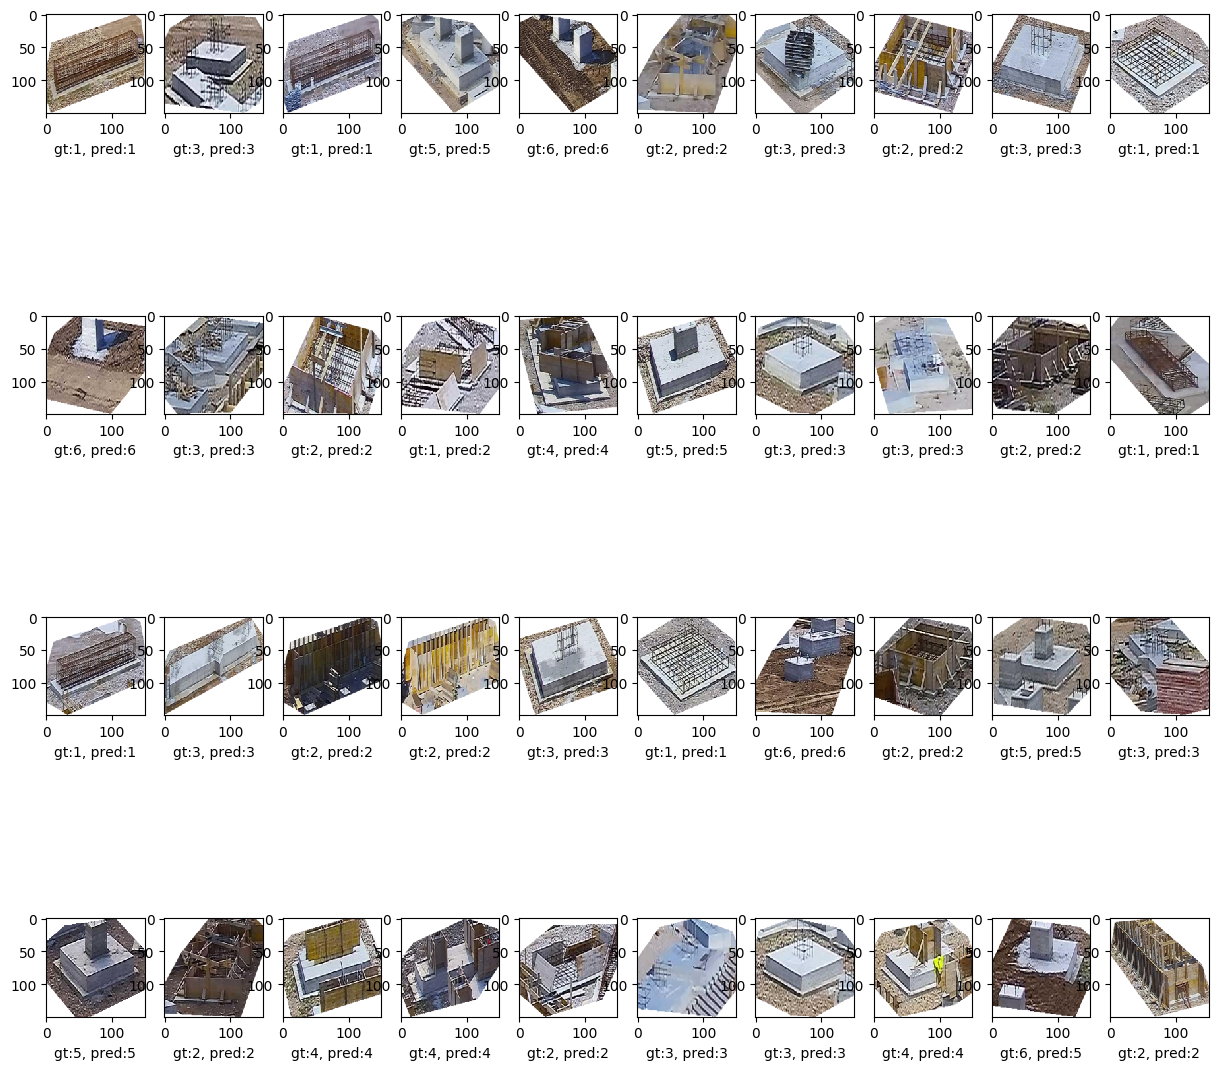

In [12]:
nrows=4
ncols=batch_size//nrows
f, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
for i in range(nrows):
    for j in range(ncols):
        axs[i][j].imshow(x[i*ncols + j].permute(1,2,0))
#         axs[i][j].set_xlabel("gt:"+classifierModel.class_labels_dict[y[i*ncols + j].item()] 
#                              + ", pred:"+classifierModel.class_labels_dict[idx[i*ncols + j]])
        axs[i][j].set_xlabel("gt:"+str(y[i*ncols + j].item()) 
                            + ", pred:"+str(idx[i*ncols + j]))
plt.show()

import random
rand = random.randint(0, 20)
# plt.savefig("results/cnn/plots_bs"+str(batch_size)+"_seed_"+str(rand)+".png")

# Accuracy analysis

In [13]:
def accuracy(preds, labels):
#     _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
accuracy(pred.indices, y)

tensor(0.9500)